In [2]:
#first compare the away and home goals and get the higher one or lower one

In [3]:
import pandas as pd 

In [4]:
data = pd.read_csv('NHL_Game_data.csv')
higherGoal = data[['away_goals','home_goals']].max(axis=1)
WinAverageGoal = higherGoal.mean()
print("The average winning team scored about " + str(round(WinAverageGoal,2)) + " goals")

The average winning team scored about 3.84 goals


In [5]:
lowerGoal = data[['away_goals','home_goals']].min(axis=1)
LoseAverageGoal = lowerGoal.mean()
print("The average losing team scored about " + str(round(LoseAverageGoal,2)) + " goals")

The average losing team scored about 1.81 goals


In [6]:
# Calculate margin of victory
margin_of_victory = data[['home_goals', 'away_goals']].max(axis=1) - data[['home_goals', 'away_goals']].min(axis=1)

# Calculate the correlation between winning goals and margin of victory
correlation_goals_margin = higherGoal.corr(margin_of_victory)

#finds the correlation of goals needed to win
print(f"The correlation between the number of goals needed to win and the margin of victory is: {correlation_goals_margin:.2f}")


The correlation between the number of goals needed to win and the margin of victory is: 0.63


In [7]:
#Shows the correlation between wins at home vs wins away
# Create columns for whether the home or away team won
data['home_win'] = (data['home_goals'] > data['away_goals']).astype(int)
data['away_win'] = (data['away_goals'] > data['home_goals']).astype(int)

# Calculate the correlation between home wins and away wins
correlation = data['home_win'].corr(data['away_win'])

print(f"The correlation between home wins and away wins is: {correlation:.2f}")


The correlation between home wins and away wins is: -0.95


In [8]:
#The correlation essentially shows that home wins and away wins are inversely related over time in the dataset, meaning when home teams have a 
#higher win rate, away teams tend to have a lower win rate, and vice versa. This could indicate a balance between home and away wins over 
#multiple games.

In [9]:
# Calculate win rates for home and away teams
home_win_rate = data['home_win'].mean()
away_win_rate = data['away_win'].mean()

print(f"Home win rate: {home_win_rate:.2f}")
print(f"Away win rate: {away_win_rate:.2f}")


Home win rate: 0.53
Away win rate: 0.44


In [10]:
#This shows that the home win rate is just over 50% while the away game win rate is under %50 showing that a home game is more likely.

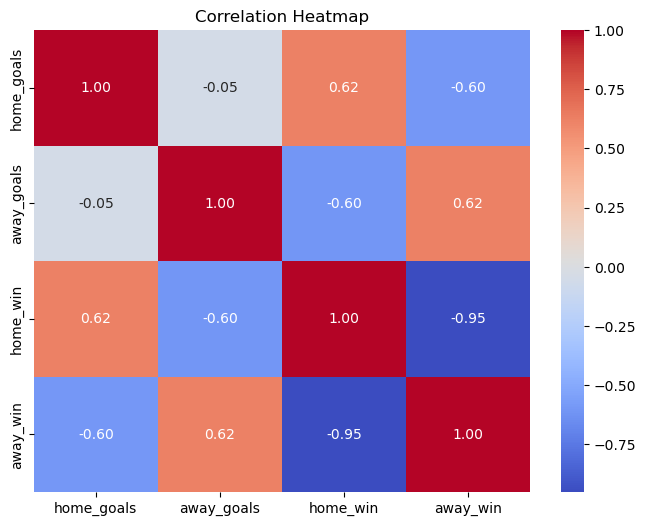

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data[['home_goals', 'away_goals', 'home_win', 'away_win']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')
plt.show()


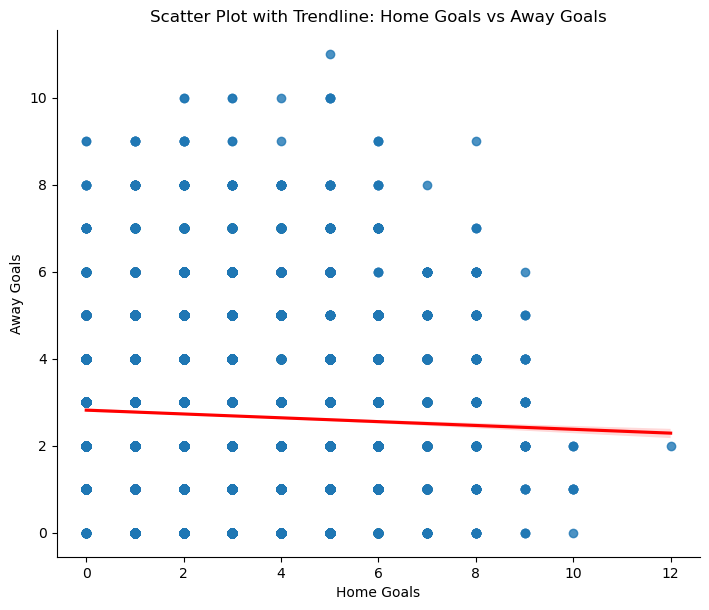

In [12]:
sns.lmplot(x='home_goals', y='away_goals', data=data, height=6, aspect=1.2, line_kws={'color': 'red'})
plt.title('Scatter Plot with Trendline: Home Goals vs Away Goals')
plt.xlabel('Home Goals')
plt.ylabel('Away Goals')
plt.show()


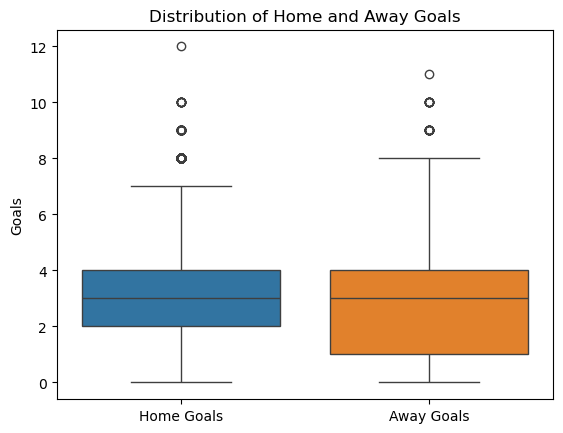

In [13]:
sns.boxplot(data=data[['home_goals', 'away_goals']])
plt.title('Distribution of Home and Away Goals')
plt.xticks([0, 1], ['Home Goals', 'Away Goals'])
plt.ylabel('Goals')
plt.show()


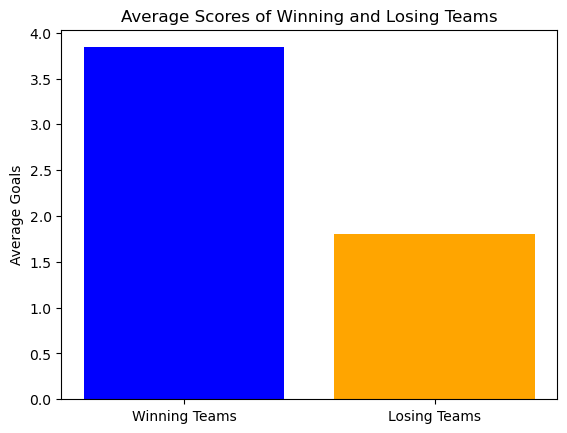

In [14]:
average_scores = {
    'Winning Teams': higherGoal.mean(),
    'Losing Teams': lowerGoal.mean()
}

plt.bar(average_scores.keys(), average_scores.values(), color=['blue', 'orange'])
plt.title('Average Scores of Winning and Losing Teams')
plt.ylabel('Average Goals')
plt.show()


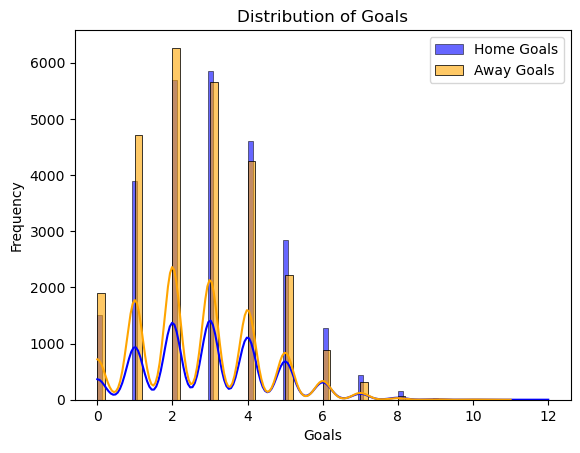

In [15]:
sns.histplot(data['home_goals'], kde=True, color='blue', label='Home Goals', alpha=0.6)
sns.histplot(data['away_goals'], kde=True, color='orange', label='Away Goals', alpha=0.6)
plt.title('Distribution of Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


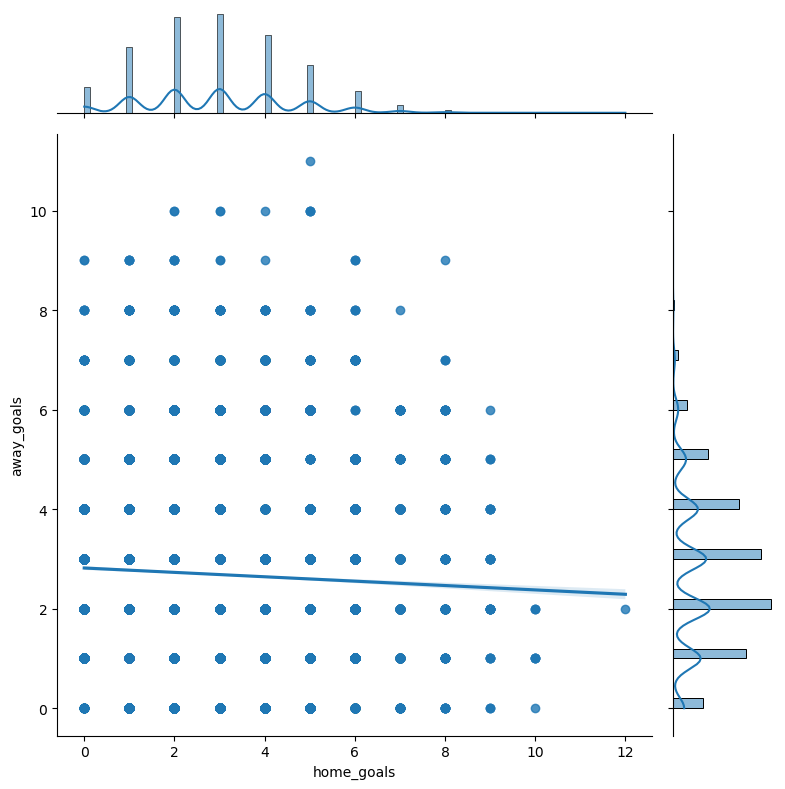

In [16]:
sns.jointplot(x='home_goals', y='away_goals', data=data, kind='reg', height=8, ratio=5, space=0.2)
plt.show()


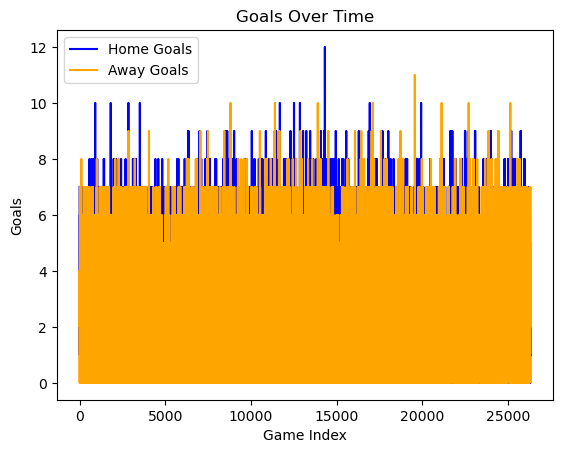

In [17]:
plt.plot(data.index, data['home_goals'], label='Home Goals', color='blue')
plt.plot(data.index, data['away_goals'], label='Away Goals', color='orange')
plt.title('Goals Over Time')
plt.xlabel('Game Index')
plt.ylabel('Goals')
plt.legend()
plt.show()


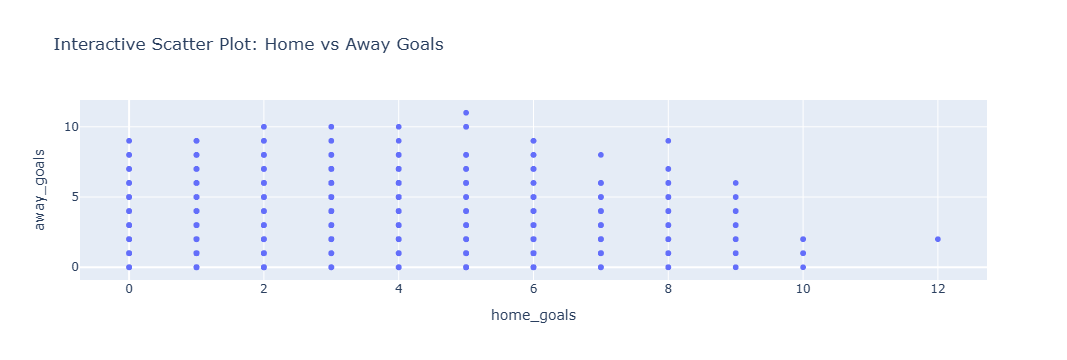

In [19]:
import plotly.express as px

fig = px.scatter(data, x='home_goals', y='away_goals', title='Interactive Scatter Plot: Home vs Away Goals')
fig.show()
